#### For google colabs only 

In [1]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [0]:
!git clone https://github.com/sushil79g/customer_review.git

fatal: destination path 'customer_review' already exists and is not an empty directory.


**Import libraries**

In [0]:
#numpy for mathmatical computation
import numpy as np
#pandas for dataframe computation i.e overall sql processing
import pandas as pd


In [0]:
#importing file with pandas
file = pd.read_csv('customer_review/employee_reviews.csv')
#lets look @dataset
file.head(3)

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...


In [0]:
#list of attribute in dataset
file.columns

Index(['Unnamed: 0', 'company', 'location', 'dates', 'job-title', 'summary',
       'pros', 'cons', 'advice-to-mgmt', 'overall-ratings',
       'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'helpful-count', 'link'],
      dtype='object')

###  #1 Data Preprocessing

In [0]:
# lets chop out only important attribute for out project
imp_column = ['pros','cons','overall-ratings','summary']

In [0]:
our_dataset = file[imp_column]

In [0]:
our_dataset.head(5)

,pros,cons,overall-ratings,summary
0,People are smart and friendly,Bureaucracy is slowing things down,5.0,Best Company to work for
1,"1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,4.0,"Moving at the speed of light, burn out is inev..."
2,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",5.0,Great balance between big-company security and...
3,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,5.0,The best place I've worked and also the most d...
4,Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",5.0,"Unique, one of a kind dream job"


###### Above dataframe is extracted from previous dataset for which we are intrested to train our model.

In [0]:
# As the task is all about reviewing sentiment, lets combine the overall review from each employee
our_dataset['all_review'] = our_dataset['pros'] + our_dataset['cons'] + our_dataset['summary']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
import re #python module for regular expression
import nltk #python module for natural language processing
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##### Removing punctuation

In [0]:
def remove_punctuation(x):
    line = re.sub(r'[^a-zA-Z ]+', ' ', str(x))
    return line

##### Removing stopwords

In [0]:
def remove_stopword(x):
    line = [word for word in x if not word in set(stopwords.words('english'))]
    return line

##### Converting to lower_case

In [0]:
def conv_lower(x):
    new = []
    for item in x:
        new.append(item.lower())
    return new

##### Here we do two task:
1)Stemming and lammatizing sentence

2)Correction of spelling

In [0]:
nltk.download('wordnet')
lemma = nltk.wordnet.WordNetLemmatizer()
lemma.lemmatize('article')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
from textblob import TextBlob
def app_lamitz(x):
  try:
    words = x.split()
    result = []
    for wor in words:
      # print(nltk.pos_tag(wor)[0][1][0])
      if nltk.pos_tag(wor)[0][1][0]=='J':
        wor = lemma.lemmatize(wor)
#         print(wor)
      result.append(wor)
    value = ' '.join(result)
    b = TextBlob(value)
    return b.correct()
  except:
    b = TextBlob(x)
    return b.correct()


In [0]:
def preprocess_all_review(x):
    re_punct = remove_punctuation(x)
    re_stopword = remove_stopword(re_punct)
    line_lower = conv_lower(re_stopword)
    result = ' '.join(re_stopword)
    return line_lower
our_dataset['preprocess_review'] = our_dataset['all_review'].apply(preprocess_all_review)

In [0]:
#another approch of doing
def preprocess_all_review(x):
    line = re.sub(r'[^a-zA-Z ]+', ' ', str(x))
    line = line.lower()
    line = line.split()
    line = [word for word in line if not word in set(stopwords.words('english'))]
    line = ' '.join(line)
    return line
our_dataset['preprocess_review'] = our_dataset['all_review'].apply(preprocess_all_review)

In [0]:
our_dataset.head(5)

In [0]:
import seaborn as sns

In [0]:
sns.countplot(x = 'overall-ratings', data=our_dataset)

###  #2 Feature Extraction and Vectorization

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**Converting text into numerical matrix**
<br>**CountVectorizer convert text data to numerical values and in vector form(vector in general is multi-dimension array matrix).**


> Indented block



In [0]:
count_vect = CountVectorizer(max_features=3000)
x = count_vect.fit_transform(reviews).toarray()

In [0]:
y = our_dataset['overall-ratings']

## #3 Classifier

** 1) Using Naive Bayes**

**Spliting the dataset to train and test data**

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [0]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 493,  164,  150,  101,  279],
       [ 437,  231,  240,  224,  467],
       [ 465,  400,  548,  671, 1702],
       [ 485,  472,  606, 1174, 4022],
       [ 385,  311,  317,  778, 5137]])

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.22      0.42      0.29      1187
         2.0       0.15      0.14      0.15      1599
         3.0       0.29      0.14      0.19      3786
         4.0       0.40      0.17      0.24      6759
         5.0       0.44      0.74      0.55      6928

   micro avg       0.37      0.37      0.37     20259
   macro avg       0.30      0.32      0.28     20259
weighted avg       0.36      0.37      0.33     20259



**Sepreating the reviews on the basis of rating to two polarities.**

**2) Using Logistic Regression**

In [0]:
our_dataset['polarity'] = our_dataset['overall-ratings'].apply(lambda x: 1 if x>3 else 0 )

In [0]:
file = our_datastet[['preprocess_review','polarity']]

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

**N-gram convert n-number of words to vector representation.**
</br>An N-gram is a sequence of N words: a 2-gram (or bigram) is a two-word sequence of words like “please turn”, “turn your”, or ”your homework”, and a 3-gram (or trigram) is a three-word sequence of words like “please turn your”, or “turn your homework"

In [0]:
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(file['preprocess_review'].values.astype('U'))
x = ngram_vectorizer.transform(file['preprocess_review'].values.astype('U'))

**Split in 7:3 ration, where  70% is train data and 30% is test data**

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, file['polarity'], train_size = 0.7)

**"c" is Inverse regularization parameter of logistic regression. Fitting model with different value of 'c'**

In [0]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(C=c)
    lr.fit(x_train, y_train)
    print ("Accuracy for C=%s: %s"% (c, accuracy_score(y_test, lr.predict(x_test))))

In [0]:
lr = LogisticRegression(C=0.05)
lr.fit(x_train, y_train)
# print ("Accuracy for C=%s: %s"% (c, accuracy_score(y_test, lr.predict(x_test))))


In [0]:
def get_text_result(text):
  transformed_text = ngram_vectorizer.transform([text]) #To transfer the input text to vector
  prob_list = lr.predict_proba(transformed_text).tolist() #To predict probability of polarrity
  max_value_prob = max(prob_list)
  max_index = lis.index(max_value_prob)
  
  if max_index == 0:
    return('negative',max_value_prob)    
  
  return ('positive',max_value_prob)

In [0]:
print(get_text_result('i really do not have intrest in living the place'))

[[0.2936526147235998, 0.7063473852764002]]
('negative', [0.2936526147235998, 0.7063473852764002])


**Our data has huge Biasness so we are stratifing the training data into Kfold**

In [0]:
#using stratifiedKFlod
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
y = file['polarity']
skf.get_n_splits(x, y)

5

In [0]:
for train_index, test_index in skf.split(x, y):
   x_train, x_test = x[train_index], x[test_index]
   y_train, y_test = y[train_index], y[test_index]
   lr = LogisticRegression(C=0.05)
   lr.fit(x_train, y_train)
   print ("Accuracy for C=%s: %s"%(0.05, accuracy_score(y_test, lr.predict(x_test))))

TRAIN: [12059 12060 12061 ... 67527 67528 67529] TEST: [    0     1     2 ... 15692 15693 15694]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.05: 0.8076552898497076
TRAIN: [    0     1     2 ... 67527 67528 67529] TEST: [12059 12060 12061 ... 28254 28255 28256]
Accuracy for C=0.05: 0.7778024581667408
TRAIN: [    0     1     2 ... 67527 67528 67529] TEST: [24420 24423 24425 ... 41056 41057 41059]
Accuracy for C=0.05: 0.7914260328742782
TRAIN: [    0     1     2 ... 67527 67528 67529] TEST: [39115 39116 39117 ... 54989 54995 55008]
Accuracy for C=0.05: 0.7647712127943136
TRAIN: [    0     1     2 ... 54989 54995 55008] TEST: [53638 53639 53640 ... 67527 67528 67529]
Accuracy for C=0.05: 0.7645316549426139


In [0]:
###TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score
ngram_vectorizer = TfidfVectorizer(ngram_range=(1, 3))
ngram_vectorizer.fit(file['preprocess_review'].values.astype('U'))
x = ngram_vectorizer.transform(file['preprocess_review'].values.astype('U'))
x_train_rating, x_test_rating, y_train_rating, y_test_rating = train_test_split(x, file['polarity'], train_size = 0.70)
for c in [1.5,1.75,2.0,2.5,3.0,3.5,4.0,4.5,5.0]:
    lr = LogisticRegression(C=c)
    lr.fit(x_train_rating, y_train_rating)
    print ("Accuracy for C=%s: %s"%(c, accuracy_score(y_test_rating, lr.predict(x_test_rating) ) ))
    print( 'precision:',precision_score(y_test_rating, lr.predict(x_test_rating) , average='macro') )
    print('recall', recall_score(y_test_rating, lr.predict(x_test_rating), average='macro'))
    print('f1-score',f1_score(y_test_rating,lr.predict(x_test_rating), average='macro'))
    print(' ')


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=1.5: 0.7897724468137618
precision: 0.7881694117126571
recall 0.7089787748490514
f1-score 0.7271092885142094
 
Accuracy for C=1.75: 0.7912532701515376
precision: 0.788187952811472
recall 0.7124279529490338
f1-score 0.7304813501305534
 
Accuracy for C=2.0: 0.7926353719334617
precision: 0.788414912757619
recall 0.715524762141379
f1-score 0.7334869203085015
 
Accuracy for C=2.5: 0.7947578853842736
precision: 0.7891187690729595
recall 0.7200467545932951
f1-score 0.7378511084286687
 
Accuracy for C=3.0: 0.7954489362752357
precision: 0.7884168362735471
recall 0.7223536538585322
f1-score 0.7398904612210772
 
Accuracy for C=3.5: 0.7960906263882719
precision: 0.788028444617427
recall 0.7243047251956987
f1-score 0.741617904350115
 
Accuracy for C=4.0: 0.7965348733896046
precision: 0.7876821219298606
recall 0.7257506625778706
f1-score 0.7428732045838329
 
Accuracy for C=4.5: 0.7964855126116788
precision: 0.7869701361165665
recall 0.7263130124070885
f1-score 0.7432636696738804
 
Accu

In [0]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import StratifiedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import precision_score, recall_score, f1_score
# tvec = TfidfVectorizer(ngram_range=(1, 3))
# lr_tf = LogisticRegression()

In [0]:
# def lr_cv(splits, X, Y, pipeline, average_method):
    
#     kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
#     accuracy = []
#     precision = []
#     recall = []
#     f1 = []
#     for train, test in kfold.split(X, Y):
#         lr_fit = pipeline.fit(X[train], Y[train])
#         prediction = lr_fit.predict(X[test])
#         scores = lr_fit.score(X[test],Y[test])
        
#         accuracy.append(scores * 100)
#         precision.append(precision_score(Y[test], prediction, average=average_method)*100)
#         print('              negative    positive     ')
#         print('precision:',precision_score(Y[test], prediction, average=None))
#         recall.append(recall_score(Y[test], prediction, average=average_method)*100)
#         print('recall:   ',recall_score(Y[test], prediction, average=None))
#         f1.append(f1_score(Y[test], prediction, average=average_method)*100)
#         print('f1 score: ',f1_score(Y[test], prediction, average=None))
#         print('-'*50)

#     print("accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))
#     print("precision: %.2f%% (+/- %.2f%%)" % (np.mean(precision), np.std(precision)))
#     print("recall: %.2f%% (+/- %.2f%%)" % (np.mean(recall), np.std(recall)))
#     print("f1 score: %.2f%% (+/- %.2f%%)" % (np.mean(f1), np.std(f1)))

In [0]:
# from sklearn.pipeline import Pipeline
# original_pipeline = Pipeline([
#     ('vectorizer', tvec),
#     ('classifier', lr_tf)
# ])
# lr_cv(5, file['preprocess_review'].values.astype('U'), file['polarity'], original_pipeline, 'macro')

####  3) Using Neural network (Fastai library)


In [0]:
file = pd.read_csv('./customer_review/employee_reviews.csv')

**Importing Deep learning library (fastai with pytorch to be exact)**

In [0]:
import fastai
from fastai import *
from fastai.text import *
from functools import partial
import io
import os

**Dropping "unnamed:0" because, this attribute is redundent and created automatically while processing dataset**

In [0]:
file.drop('Unnamed: 0',axis=1,inplace=True)

In [0]:
# file= file.dropna(how='any',axis=0,inplace=True)
file.dropna(axis=0, how='any', inplace=True)
# file.isna()
file.head(3)

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...


**There are many unnecessary data in out dataset to extracting 'positive' data into new dataset.**

In [0]:
dataset = pd.DataFrame()
dataset['text'] = file['pros']
dataset['label'] = 'positive'
dataset.head()

,text,label
0,People are smart and friendly,positive
1,"1) Food, food, food. 15+ cafes on main campus ...",positive
2,"* If you're a software engineer, you're among ...",positive
3,You can't find a more well-regarded company th...,positive
4,Google is a world of its own. At every other c...,positive


**Again, extracting the negative text to new dataframe.**

In [0]:
neg_dataset = pd.DataFrame()
neg_dataset['text'] = file['cons']
neg_dataset['label'] = 'negative'

**Combining the newly created both dataset into one.**

In [0]:
final_dataset = dataset.append(neg_dataset)

**Shuffling the dataset**

In [0]:
from sklearn.utils import shuffle
final_dataset = shuffle(final_dataset)

In [0]:
final_dataset = final_dataset.reindex_axis(['label','text','is_valid'], axis=1)
final_dataset.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


,label,text,is_valid
47019,positive,"v nice, exciting , fun and enjoyable",NaN
36105,negative,Favoritism gets you everywhere! Performance do...,NaN
20475,negative,you have to work pretty long hours/days,NaN
31966,negative,0. Horrendous pay. 1. Simply no perks. Employe...,NaN
32675,positive,At amazon you get to work with the most talent...,NaN


In [0]:
def preprocess_all_review(x):
    line = re.sub(r'[^a-zA-Z ]+', ' ', str(x))
    line = line.lower()
    line = line.split()
    line = [word for word in line if not word in set(stopwords.words('english'))]
    line = ' '.join(line)
    return line
final_dataset['text']=final_dataset['text'].apply(preprocess_all_review)

In [0]:
final_dataset['is_valid'].unique()

array(['negative', 'positive'], dtype=object)

**Making nearly 27k review as validation dataset**

In [0]:
final_dataset['is_valid'] = 'False'
change = final_dataset.sample(27011).index
final_dataset.loc[change,'is_valid'] = 'True'


In [0]:
def polar(x):
  if x>=3.0:
    return 'positive'
  else:
    return 'negative'
file['polarity'] = file['overall-ratings'].apply(polar)

**Converting the text data to vectorizer form.**

In [0]:
final_dataset.to_csv('texts.csv')
data_lm = TextLMDataBunch.from_csv(csv_name='texts.csv',path='.',text_cols='text',label_cols='label')

**Converting the vectorizer form, suitable for training to Attention with LSTM model **

In [0]:
data_clas = TextClasDataBunch.from_csv(csv_name='texts.csv',path='.',text_cols='text',label_cols='label', vocab=data_lm.train_ds.vocab, bs=32)

In [0]:
data_lm.save('data_lm_export.pkl')
data_clas.save('data_clas_export.pkl')

In [0]:
data_lm = load_data('.', 'data_lm_export.pkl')
data_clas = load_data('.', 'data_clas_export.pkl', bs=16)

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.138028,3.921427,0.284739,06:08


In [0]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.722393,3.661165,0.316539,07:20


In [0]:
learn.predict("This is a review about", n_words=10)

'This is a review about and feel like you ’re working at Microsoft ,'

In [0]:
learn.save_encoder('ft_enc')

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')

In [0]:
data_clas.show_batch()


text,target
"xxbos - xxmaj you will likely start as a xxup picker , the grunts / backbone of xxmaj amazon itself , they walk between 9 - 12 miles a night ( xxmaj average rates ) to between 12 - 20 miles a night . xxmaj on foot . ( 200 - 300 % rate . ) xxmaj the latter figure of 20 is extremely hard / rare , but we",negative
"xxbos xxmaj great pay bump compared to xxup xxunk ( you will also likely receive a hiring bonus and a xxup rsu award ) , full benefits which begin on day one , lots of opportunities for professional development provided you 're willing to take on safety responsibilities outside of xxunk first aid ( not mandatory but if you want to climb that 's the next rung ) , 4",positive
"xxbos - xxmaj learning the xxmaj app xxmaj store guidelines has a steep learning curve . - xxmaj lack of communication across all teams and levels . xxmaj ideas get lost into the abyss . xxmaj messages are always misunderstood . - xxmaj no transparency with any business and operational changes . xxmaj app reviewers are never told how or why management came up with the "" solutions "" .",negative
"xxbos xxmaj burnout is real , y' all . xxmaj with the continual desire to "" raise the bar , "" the result is people who stay later , who have more papers that say they 're educated , who put work before family , or who move faster than is wise . i equate it to a xxunk with a bunch of competitive clowns at the helm . xxmaj",negative
xxbos + xxmaj you made it ! xxmaj you ’ve been hired after a grueling interview process that included everyone you ’ll be working with and your entire management chain . xxmaj they made a point of annoying you just to see how you reacted and you kept your cool and showed your smarts . xxmaj you ’re golden ! + xxmaj casual atmosphere -- you can wear shorts,positive


In [0]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.262499,0.162443,0.938024,12:30


In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.184462,0.126125,0.953890,15:20


In [0]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.138191,0.113443,0.959105,27:43


In [0]:

print(' ')
learn.predict("i really do not like to work here")

(Category negative, tensor(0), tensor([0.8796, 0.1204]))

In [0]:
learn.predict("Great to work here, such a good environment")

(Category positive, tensor(1), tensor([0.0114, 0.9886]))

In [0]:
learn.predict("i have a mix feeling for this place")

(Category positive, tensor(1), tensor([0.4098, 0.5902]))

In [0]:
learn.predict('i am extremly overwhelmed by the treacherous and torrid journey to the eutopia where i found the splendid mesmerizing scenic canvas to color my dream')

(Category negative, tensor(0), tensor([0.7492, 0.2508]))

In [0]:
learn.predict('the girl with sweet smile and charismatic attitude makes my heart full of love for her')

(Category positive, tensor(1), tensor([0.2539, 0.7461]))

In [0]:
learn.predict('I am very honoured to be part of this organization')

(Category positive, tensor(1), tensor([0.3517, 0.6483]))

In [0]:
learn.export()

### In production

In [0]:
import fastai
from fastai import *
from fastai.text import *
from functools import partial
import io
import os

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
model_path= './gdrive/My Drive/sentiment_weight'

In [0]:
learn_trained = load_learner(model_path)

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import ipywidgets as widgets

In [0]:
def record_review(org_name, polarity_value):
  with open("test.txt", "a") as myfile:
    write_text = org_name+ ',' + str(polarity_value[0]) + ',' + str(polarity_value[1]) + '\n'
    myfile.write(write_text)
    
  

In [0]:
def overall_company_review(name_of_company):
  data = pd.read_csv('test.txt', names=['company','positive','negative'])
  value = data.groupby(['company']).mean().loc[name_of_company]
  sns.barplot(x=['positive','negative'], y=tuple(reversed([100*val for val in value])))
  print('overall opinion of employee for',name_of_company,'is positive',value[1],' negative',value[0])

In [0]:
# from matplotlib.widgets import RadioButtons

def find_result(x):
  if abs(x[0]-x[1]) <= 0.15:
    return ('neutral',5)
  elif (x[0] - x[1]) >= 0.6:
    return ('extremly negative',1)
  elif (x[1] - x[0]) >= 0.6:
    return ('extremly positive',9)
  elif x[0] > x[1]:
    return ('negative',3)
  else:
    return('positive',7)
def prediction_result(x):
  a= learn_trained.predict(x)
  size = a[2].tolist()
  labels = 'negative', 'positive'
  colors = ['yellowgreen','lightskyblue']
#   a = plt.pie(size, labels=labels, colors=colors,shadow=True,autopct='%1.0f%%')
#   radio = RadioButtons(a, ('extremly negative', 'negative', 'neutral','positive','extremly positive'))
#   plt.show()
#   print(size)
  print('Text:',x)
  result = find_result(size)
  print("Sentiment class:",result[0])
  return result[1],size
  


In [0]:
def prediction_result_polarity(x):
  a= learn_trained.predict(x)
  size = a[2].tolist()
  labels = 'negative', 'positive'
  colors = ['yellowgreen','lightskyblue']
#   a = plt.pie(size, labels=labels, colors=colors,shadow=True,autopct='%1.0f%%')
#   radio = RadioButtons(a, ('extremly negative', 'negative', 'neutral','positive','extremly positive'))
#   plt.show()
#   print(size)
#   print('Text:',x)
#   result = find_result(size)
#   print("Sentiment class:",result[0])
  return size

In [0]:
def review_show(org_name,review):
  res = prediction_result(review)
  widgets.IntSlider(value=res[0],min=0,max=10,step=1,description='Sentiment:',disabled=False,continuous_update=False,orientation='horizontal',readout=False,readout_format='d')
  record_review(org_name, res[1])
review_show('leapfrog','it feels good working in abc company')

Text: it feels good working in abc company
Sentiment class: extremly positive


In [0]:
review_show('leapfrog','Fun and innovative place to work. Would highly recommend to any freshers')

Text: Fun and innovative place to work. Would highly recommend to any freshers
Sentiment class: extremly positive


In [0]:
review_show('leapfrog','Have good culture, Friendly environment. Room for growth')

Text: Have good culture, Friendly environment. Room for growth
Sentiment class: extremly positive


In [0]:
review_show('leapfrog','This organisation has a potential to team up and solve the  day to day  issue with innovation and team work')

Text: This organisation has a potential to team up and solve the  day to day  issue with innovation and team work
Sentiment class: extremly positive


In [0]:
review_show('leapfrog','the work culture  here  has a contrast with similarity, slightly flexible but strict to the deadline,which makes our work easy and quite pushing at the same time')
 

Text: the work culture  here  has a contrast with similarity, slightly flexible but strict to the deadline,which makes our work easy and quite pushing at the same time
Sentiment class: negative


In [0]:
review_show('leapfrog','This organisation has not enough character to build and solve the day to day  issue with integrity and hard work.')

Text: This organisation has not enough character to build and solve the day to day  issue with integrity and hard work.
Sentiment class: extremly negative


In [0]:
review_show('leapfrog', "I like this company. The work culture is great and the benifits are awesome")

Text: I like this company. The work culture is great and the benifits are awesome
Sentiment class: extremly positive


In [0]:
review_show('fuse', 'i find the company really frustrating. As, i am spritual person i tend to find happiness around anything.')

Text: i find the company really frustrating. As, i am spritual person i tend to find happiness around anything.
Sentiment class: extremly negative


In [0]:
review_show('fuse', 'I am having a good time in this comapny. I guess i will continue to have such.')

Text: I am having a good time in this comapny. I guess i will continue to have such.
Sentiment class: positive


In [0]:
review_show('fuse','I have a mix feeling for the company. On one hand, I see many people over here energetic and responsible towards their set-goal. On other hand, I see so many frustrated employee in this company. So, in conclusion i think, people are energetic because of challenging project they are recieving and some are frustrated because they are not being paid as they deserve.')

Text: I have a mix feeling for the company. On one hand, I see many people over here energetic and responsible towards their set-goal. On other hand, I see so many frustrated employee in this company. So, in conclusion i think, people are energetic because of challenging project they are recieving and some are frustrated because they are not being paid as they deserve.
Sentiment class: negative


In [0]:
review_show('fuse',' I am extremly happy being here. It is like my dream come true moment.')

Text:  I am extremly happy being here. It is like my dream come true moment.
Sentiment class: positive


In [0]:
review_show('fuse','This is extra-ordinary to work people here are well managed well responsible and proactive in nature.')

Text: This is extra-ordinary to work people here are well managed well responsible and proactive in nature.
Sentiment class: extremly positive


overall opinion of employee for leapfrog is positive 0.7528850989682334  negative 0.24711487971113197


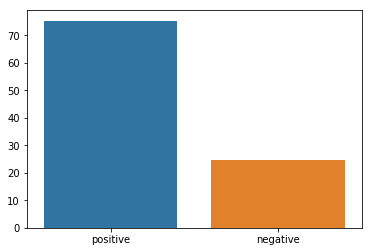

In [0]:
overall_company_review('leapfrog')

overall opinion of employee for fuse is positive 0.5249554634094238  negative 0.47504452988505363


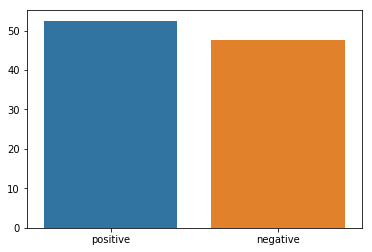

In [0]:
overall_company_review('fuse')

In [0]:
review_show('leapfrog','it was sadly awesome')

Text: it was sadly awesome
Sentiment class: extremly positive


Review summerization
""

In [0]:
prediction_result('it was sadly awesome')

Text: it was sadly awesome
Sentiment class: extremly positive


(9, [0.1904989331960678, 0.8095009922981262])

In [0]:
!pip install paramiko
from gensim.summarization.summarizer import summarize

     |████████████████████████████████| 194kB 4.7MB/s 
     |████████████████████████████████| 2.3MB 20.9MB/s 
     |████████████████████████████████| 768kB 44.0MB/s 
     |████████████████████████████████| 61kB 25.7MB/s 
     |████████████████████████████████| 102kB 32.4MB/s 


In [0]:
review_show('leapfrog','It would be nice to have some place to keep our bags or stuffs... i.e. locker or something like that')

Text: It would be nice to have some place to keep our bags or stuffs... i.e. locker or something like that
Sentiment class: positive


In [0]:
review_show('leapfrog','Leapfrog has a friendly environment. Its a good place to grow.')

Text: Leapfrog has a friendly environment. Its a good place to grow.
Sentiment class: extremly positive


In [0]:
review = 'Good working environment. Nice culture. Space to grow. I like the company overall, it is cool place to work, having lots of project i think i will have a pace growth I like Leapfrog believe on freedom, responsibility, flexibility. Since thi is for training the data i would like to give conflicting feedback so that the model can be trained better. I like it here, but it could definitely have been better. It is amazing, buuuuutttttt is it?????? LF really gives individuals the flexibility to try things they like, and that works well when it comes to experimental projects and research. What kind of feedback am i suppose to give.I mean feedback for any particular topic or random overall feedback, Overall I suppose it good to be here. Cool and great place to work. Fresher paradise. Its disrespect. So far so good, feels quite disturbed to do work sometimes. Everyone is very helpful. keep my data safe :D Great working environment, great people Leapfrog is a great platform for young engineers to get real time experiences with startups in the valley and take a leap forward after their university degree like no other. The AIPP program helps take AI enthusiasts take a step forward in realizing their dream. Its fun here. Leapfrog has great learning and working environment.It has an open culture and people are very helpful Please improve the food quality. I am satisfied with my colleagues and but feel something lagging in work culture or Its feels like there is not enough professionalism,but at the end of the tunnel,I see much jolly workspace and work become fun when there is a Sameer dai in front of our desk. I enjoy the culture of Leapfrog. A learning, fun experience filled fruitful year. I wish to contribute more and grow along with the company. I am very happy to be part of this team. I am current feeling good with the working environment where anyone can ask question to anyone and every one is happy to help each other. But the lunch provided by leapfrog is some what no good, especially burger :P and chicken chilly. It would be nice to have some place to keep our bags or stuffs... i.e. locker or something like that Leapfrog has a friendly environment. Its a good place to grow. Everything here is good people are motivating and growth loving. if i have to give a suggestion for this company please put milk and coffee making machine. Thank you Snacks are dull more often than not. Working environment is friendly and great opportunity to learn.'

In [0]:
def summerizer_overall(file, ratio = 0.1, col=None, attribute=None,review='review'):
  if col is None:
    if attribute is not None:
      raise ValueError("With attribute column name is required. Please provide 'col' parameter")
  else:
    if col not in file.columns:
      raise ValueError('Given column is not in present.')
    
    if attribute is None:
      text = list(file[col])
      summary = ' '.join([item for item in list(file[review]) if isinstance(item, str)] )
      return summary
    
    elif attribute not in list(file[col].unique()):
      raise ValueError('Given attribute is not present in ',col)
    
    else:
      rev = ' '.join([item for item in list(file[file[col]==attribute][review]) if isinstance(item, str)] )
      return summarize(rev,ratio)
      
      

In [0]:
def visualize_overall(file, ratio = 0.1, col=None, attribute=None,review='review'):
  f, axes = plt.subplots(1, 2)
  fig.tight_layout()
  if col is None:
    if attribute is not None:
      raise ValueError("With attribute column name is required. Please provide 'col' parameter")
  else:
    if col not in file.columns:
      raise ValueError('Given column is not in present.')
    
    if attribute is None:
      text = list(file[col])
      sns.distplot(leap_data['positivity'],kde=True,color='green',rug=True,ax=axes[0])
      sns.distplot(leap_data['negativity'],kde=True,color='cyan',ax=axes[1])
      
    
    elif attribute not in list(file[col].unique()):
      raise ValueError('Given attribute is not present in ',col)
    
    else:
      sns.distplot(leap_data[leap_data[col]==attribute]['positivity'],kde=True,color='green',rug=True,ax=axes[0])
      sns.distplot(leap_data[leap_data[col]==attribute]['negativity'],kde=True,color='cyan',ax=axes[1])

In [0]:
def check_string(x):
  abc = len(x.split())
  if abc<3:
    return False
  else:
    return True
# leap_data = leap_data[ leap_data['Write your feedback to Leapfrog.'].apply(check_string)]

overall opinion of employee for leapfrog is positive 0.7528850989682334  negative 0.24711487971113197


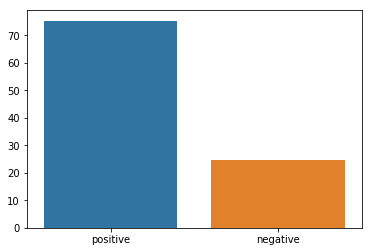

In [0]:
overall_company_review('leapfrog')

In [0]:
def show_summary(file, ratio = 0.1, col=None, attribute=None,review='review'):
  summary = summerizer_overall(file,ratio,col,attribute,review)
  if len(summary.split()) < 3:
    print('Too less data to summerize. Tips: Try increasing ratio value.')
  else:
    print(summary)


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# col = 'Department'
# for index,section in enumerate(leap_data[col].unique()):
#   text = ' '.join(list(leap_data[leap_data[col]==section]['Write your feedback to Leapfrog.']))
#   result = prediction_result(text)
#   ax = plt.subplot(1, len(leap_data[col].unique()), index+1)
#   ax.bar(['negative','Positive'], result[1])
#   ax.set_xlabel(section)

  
  

# ***Data visualization***

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
leap_data = pd.read_csv('./gdrive/My Drive/dataset_csv/feedback_leap.csv')

In [0]:
leap_data.head(5)

,Timestamp,Gender,Age,How long have you been working at leapfrog ?,Department,Write your feedback to Leapfrog.
0,2019/04/25 10:29:13 AM GMT+5:45,Male,21,less than a year,Engineering,Good working environment. Nice culture. Space ...
1,2019/04/25 10:30:38 AM GMT+5:45,Male,22,less than a year,Engineering,"I like the company overall, it is cool place t..."
2,2019/04/25 10:33:34 AM GMT+5:45,Male,30,5 years,Engineering,"I like Leapfrog believe on freedom, responsibi..."
3,2019/04/25 10:38:06 AM GMT+5:45,Female,23,less than a year,Engineering,Since this is for training the data i would li...
4,2019/04/25 10:53:15 AM GMT+5:45,Male,24,1 years,Engineering,LF really gives individuals the flexibility to...


In [0]:
leap_data.rename(columns={'Timestamp':'time','Gender':'gender','Age':'age','How long have you been working at leapfrog ?':'work_time','Department':'department','Write your feedback to Leapfrog.':'review'},inplace=True)

In [0]:
# from itertools import izip
def polarity(x):
  return (prediction_result_polarity(x))
leap_data['negativity'],leap_data['positivity'] = zip(*leap_data['review'].apply(polarity))

In [0]:
leap_data.head(2)

,time,gender,age,work_time,department,review,negativity,positivity
0,2019/04/25 10:29:13 AM GMT+5:45,Male,21,less than a year,Engineering,Good working environment. Nice culture. Space ...,0.003150,0.996850
1,2019/04/25 10:30:38 AM GMT+5:45,Male,22,less than a year,Engineering,"I like the company overall, it is cool place t...",0.037897,0.962103


In [0]:
import seaborn as sns
from textblob import TextBlob
import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English

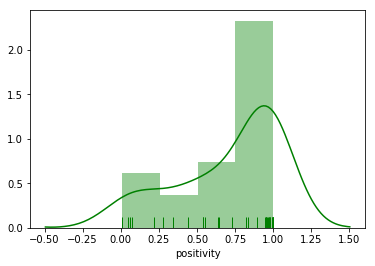

In [0]:
sns.distplot(leap_data['positivity'],kde=True,color='green',rug=True)

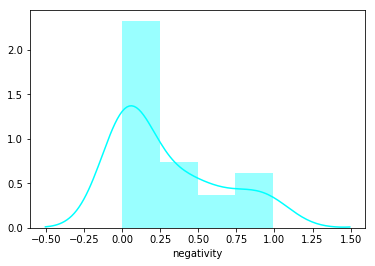

In [0]:
sns.distplot(leap_data['negativity'],kde=True,color='cyan')

overall opinion of employee for leapfrog is positive 0.7714083880186081  negative 0.2285915870917961


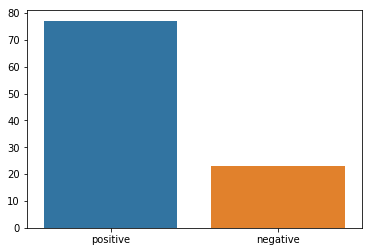

In [0]:
overall_company_review('leapfrog')

In [0]:
from wordcloud import WordCloud, STOPWORDS




text = list(leap_data['review'])
text = ''.join(text)

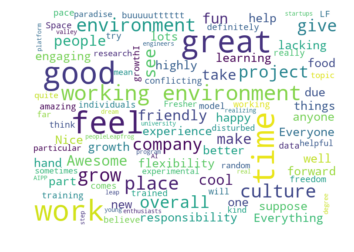

In [0]:
stopwords = set(STOPWORDS)
stopwords.update(['Leapfrog','feedback','sometime','something'])
wordcloud = WordCloud(width=700,height=500,stopwords=stopwords,max_font_size=70, max_words=100, background_color="white",).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
col = ['gender','age','work_time','department']
val = [list(leap_data[item].unique()) for item in col]
val = [item + [None] for item in val]
# for item in val:
#   new_val.append(item)
geo2 = dict(zip(col, val))
# val

In [0]:
from IPython.html import widgets
from IPython.display import display

geo={'leapfrog':['gender','age','work_time','department']}



def find_result(attri,section):
    show_summary(leap_data,ratio=0.1,col=attri,attribute=section,review='review')

def select_attri(company):
    cityW.options = geo[company]

#add in 'select district' function that looks in the new dictionary
def select_section(attri):
    districtW.options = geo2[attri]

scW = widgets.Dropdown(options=geo.keys())
init = scW.value
cityW = widgets.Dropdown(options=geo[init])


init2= cityW.value #new start value for district dropdown
districtW = widgets.Dropdown(options=geo2[init2]) #define district dropdown widget

j = widgets.interactive(find_result, attri=cityW, section=districtW) #define district value
i = widgets.interactive(select_attri, company=scW)

k = widgets.interactive(select_section, attri=cityW) #call everything together with new interactive

display(i)
display(j)

interactive(children=(Dropdown(description='company', options=('leapfrog',), value='leapfrog'), Output()), _do…

interactive(children=(Dropdown(description='attri', options=('gender', 'age', 'work_time', 'department'), valu…

In [0]:
from IPython.display import clear_output
text = widgets.Text()
display(text)
def handle_submit(sender):
#   clear_output()
  review_show('leapfrog',sender.value)
text.on_submit(handle_submit)

Text(value='')

In [0]:
from IPython.html import widgets
from IPython.display import display

geo={'leapfrog':['gender','age','work_time','department']}



def find_result(attri,section):
    visualize_overall(leap_data,ratio=0.1,col=attri,attribute=section,review='review')

def select_attri(company):
    cityW.options = geo[company]

#add in 'select district' function that looks in the new dictionary
def select_section(attri):
    districtW.options = geo2[attri]

scW = widgets.Dropdown(options=geo.keys())
init = scW.value
cityW = widgets.Dropdown(options=geo[init])


init2= cityW.value #new start value for district dropdown
districtW = widgets.Dropdown(options=geo2[init2]) #define district dropdown widget

j = widgets.interactive(find_result, attri=cityW, section=districtW) #define district value
i = widgets.interactive(select_attri, company=scW)

k = widgets.interactive(select_section, attri=cityW) #call everything together with new interactive

display(i)
display(j)

interactive(children=(Dropdown(description='company', options=('leapfrog',), value='leapfrog'), Output()), _do…

interactive(children=(Dropdown(description='attri', options=('gender', 'age', 'work_time', 'department'), valu…

*Entity Recognition*

In [0]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [0]:
from textblob import TextBlob
from pprint import pprint

In [0]:
leap_data.head(5)

,time,gender,age,work_time,department,review,negativity,positivity
0,2019/04/25 10:29:13 AM GMT+5:45,Male,21,less than a year,Engineering,Good working environment. Nice culture. Space ...,0.003150,0.996850
1,2019/04/25 10:30:38 AM GMT+5:45,Male,22,less than a year,Engineering,"I like the company overall, it is cool place t...",0.037897,0.962103
2,2019/04/25 10:33:34 AM GMT+5:45,Male,30,5 years,Engineering,"I like Leapfrog believe on freedom, responsibi...",0.050219,0.949781
3,2019/04/25 10:38:06 AM GMT+5:45,Female,23,less than a year,Engineering,Since this is for training the data i would li...,0.659563,0.340437
4,2019/04/25 10:53:15 AM GMT+5:45,Male,24,1 years,Engineering,LF really gives individuals the flexibility to...,0.023452,0.976548


In [0]:
doc = nlp(''.join(list(leap_data[leap_data['age']==21]['review'])))
doc

Good working environment. Nice culture. Space to grow.Up to the point, i like the environment , projects here are so engaging and i see myself growing over the time. Hope this type of environment continue to happen.client expect more things within a short period of time, on one hand it makes me grow rapidly but on the other hand, i sometime feels like if there is more time i could make project which i am currently working on more efficient and highly optimize.sometime it is more harder to manage everythingMeeting new people during time makes me realise the responsibility Everyone is supportive here. I see my growth

In [0]:
from collections import Counter
labels = [x.text for x in doc.ents if len(x.text)>2]
labels

[]

In [0]:
# b = TextBlob()
# pprint(b.correct())
for item in labels:
  b = TextBlob(item)
  pprint(b.correct())
  